# 주제: Intrusion detection

# Data
https://www.kaggle.com/sampadab17/network-intrusion-detection

### 컬럼  
- duration: continuous
    - length (number of seconds) of the connection 
- protocol_type: discrete
    - type of the protocol
        - tcp: Transmission Control Protocol
        - udp: User Datagram Protocol    
        - icmp: Internet Control Message Protocol
- service: descrete
    - network service on the destination
        - http,private,domain_u,smtp,ftp_data등 총66개
- flag: discrete
    - normal or error status of the connection 
        - SF: Normal establish & termination (>0 byte counts)
        - S0: Connection attempt seen, no reply
        - S1: Connection established, not terminated (0 byte counts)
        - S2: Established, ORIG attempts close, no reply from RESP.
        - S3: Established, RESP attempts close, no reply from ORIG.
        - REJ: Connection attempt rejected
        - RSTO: Established, ORIG aborted (RST)
        - RSTR: Established, RESP aborted (RST)
        - RSTOS0: ORIG sent SYN then RST; no RESP SYN-ACK
        - SH: ORIG sent SYN then FIN; no RESP SYN-ACK (“half-open”)
        - OTH: No SYN, not closed. Midstream traffic. Partial connection.
- src_bytes: continuous
    - number of data bytes from source to destination
- dst_bytes: continuous
    - number of data bytes from destination to source 
- land: discrete
    - local area network denial
    - 1 if connection is from/to the same host/port; 0 otherwise
- wrong_fragment: continuous
    - number of wrong fragments 
- urgent: continuous
    - number of urgent packets 
- hot: continuous
    - number of hot indicators
- num_failed_logins: continuous
    - number of failed login attempts 
- logged_in: discrete
    - 1 if successfully logged in; 0 otherwise 
- num_compromised: continuous
    - number of compromised conditions 
- root_shell: discrete
    - 1 if root shell is obtained; 0 otherwise 

# scaler
1. standard scaler
2. min/max scaler

# encoding
1. label encoding
2. onehot enconding
asdfasdf


### 순서
이진분류모델  
 
- decision tree , randomforest, maxdept를 안주고 중요도뽑는다. 
- feature_importances가 0이거나 0에 가까운거 하나씩 줄여가면서 
- 성능좋은 데이터를 만든다.

베이스 모델에 적용  
분류  
- knn  
- xgboost
회귀  
- logistic regression  
모델별 hyperparameter 조절로 최적의 모델 선정.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Train_data.csv')

In [33]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [23]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

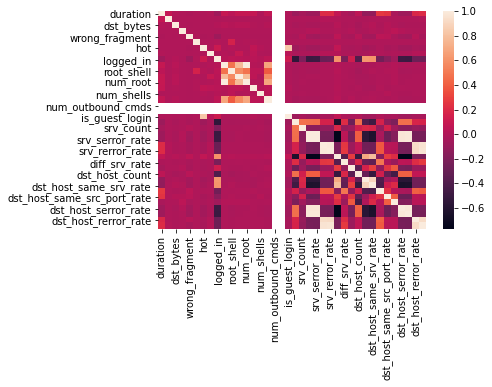

In [10]:
sns.heatmap(df.corr())
plt.show()

In [14]:
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


In [12]:
df.corr().shape

(38, 38)

In [20]:
df['root_shell'].value_counts()

0    25153
1       39
Name: root_shell, dtype: int64

In [19]:
df['num_failed_logins'].value_counts()

0    25169
1       19
2        2
3        1
4        1
Name: num_failed_logins, dtype: int64

In [18]:
df['num_compromised'].value_counts()

0      24920
1        194
2         21
4         13
6          8
3          7
5          5
12         2
151        2
7          2
884        1
789        1
558        1
462        1
110        1
157        1
13         1
193        1
107        1
457        1
217        1
9          1
520        1
19         1
83         1
38         1
371        1
31         1
Name: num_compromised, dtype: int64

In [17]:
df['hot'].value_counts()

0     24672
2       200
1        78
30       55
28       52
4        37
6        26
5        17
22       13
24        9
19        8
3         7
18        6
14        3
7         2
20        1
25        1
11        1
12        1
77        1
17        1
15        1
Name: hot, dtype: int64

In [16]:
df['urgent'].value_counts()

0    25191
1        1
Name: urgent, dtype: int64

In [15]:
df['logged_in'].value_counts()

0    15247
1     9945
Name: logged_in, dtype: int64

In [23]:
df['land'].value_counts()

0    25190
1        2
Name: land, dtype: int64

In [13]:
df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [44]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [82]:

df1 = df.select_dtypes(include=['object'])
df2 = df.select_dtypes(include=['float64', 'int64'])
y_train = df['class']

In [83]:
df3 = df1.drop(['class'],axis=1)

In [84]:
df3

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
25187,tcp,exec,RSTO
25188,tcp,ftp_data,SF
25189,tcp,private,REJ
25190,tcp,nnsp,S0


In [85]:
df2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,1,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [86]:
y_train

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

## Label Encoding

In [87]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
enc_dict={}
def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)
    enc_dict[x.name] = le.classes_
    return r

In [88]:
encodingColumns = df3.columns
encodingColumns

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [89]:
le1 = df3[encodingColumns].apply(encoding_label)


In [90]:
le1

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


In [91]:
enc_dict['protocol_type'][1], enc_dict['service'][0]

('tcp', 'IRC')

## StandardScaler

In [92]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
scaled1 = scaler.fit_transform(df2)
scaled1

array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [94]:
scaled_df1 = pd.DataFrame(scaled1, columns=df2.columns)

In [95]:
scaled_df1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


## data합치기

In [96]:
X_train = pd.concat([le1,scaled_df1],axis=1)

In [97]:
X_train

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [138]:
# drop columns 1 :num_outbound_cmds, is_host_login
X_train1 = X_train.drop(['num_outbound_cmds','is_host_login'], axis=1)

In [148]:
X_train1

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [147]:
# drop columns 2 :  land
X_train2 = X_train1.drop(['land'], axis=1)
X_train2

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [155]:
# drop columns 3 : num_shells
X_train3 = X_train2.drop(['num_shells'], axis=1)
X_train3

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.006301,-0.091933,-0.02622,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [161]:
# num_root                       0.000326
# num_file_creations             0.000198
# num_failed_logins              0.000148
# root_shell                     0.000125
# num_access_files               0.000106
# urgent                         0.000041
# su_attempted                   0.000031
#'num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'
X_train4 = X_train3.drop(['num_root','num_file_creations','num_failed_logins','root_shell', 'num_access_files', 'urgent', 'su_attempted'],axis=1)
X_train4

,protocol_type,service,flag,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091223,-0.091933,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091223,-0.091933,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091223,-0.091933,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091223,-0.091933,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


## Feature importance

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [144]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

fi = tree.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)

pred_train = tree.predict(X_train)
accuracy_score(y_train, pred_train)

0.9999603048586853

In [126]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

     anomaly       0.97      0.99      0.98     11743
      normal       0.99      0.97      0.98     13449

    accuracy                           0.98     25192
   macro avg       0.98      0.98      0.98     25192
weighted avg       0.98      0.98      0.98     25192



In [134]:
# X_train
rf = RandomForestClassifier()#max_depth=3)
rf.fit(X_train, y_train)

fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train.columns)

pred_train_rf =rf.predict(X_train)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

In [172]:
# X_train1
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train1, y_train)

fi_rf1 = rf.feature_importances_
fi_rfs1 = pd.Series(fi_rf1, index=X_train1.columns)

pred_train_rf =rf.predict(X_train1)
accuracy_score(y_train, pred_train_rf)

0.9853524928548746

In [171]:
# X_train2
rf2 = RandomForestClassifier(max_depth=5)
rf2.fit(X_train2, y_train)

fi_rf2 = rf2.feature_importances_
fi_rfs2 = pd.Series(fi_rf2, index=X_train2.columns)

pred_train_rf =rf2.predict(X_train2)
accuracy_score(y_train, pred_train_rf)

0.9855112734201333

In [169]:
# X_train3
rf3 = RandomForestClassifier(max_depth=5)
rf3.fit(X_train3, y_train)

fi_rf3 = rf3.feature_importances_
fi_rfs3 = pd.Series(fi_rf3, index=X_train3.columns)

pred_train_rf =rf3.predict(X_train3)
accuracy_score(y_train, pred_train_rf)

0.9858685296919657

In [170]:
# X_train4
rf4 = RandomForestClassifier(max_depth=5)
rf4.fit(X_train4, y_train)

fi_rf4 = rf4.feature_importances_
fi_rfs4 = pd.Series(fi_rf4, index=X_train4.columns)

pred_train_rf =rf4.predict(X_train4)
accuracy_score(y_train, pred_train_rf)

0.9857097491267068

In [152]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00     11743
      normal       1.00      1.00      1.00     13449

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



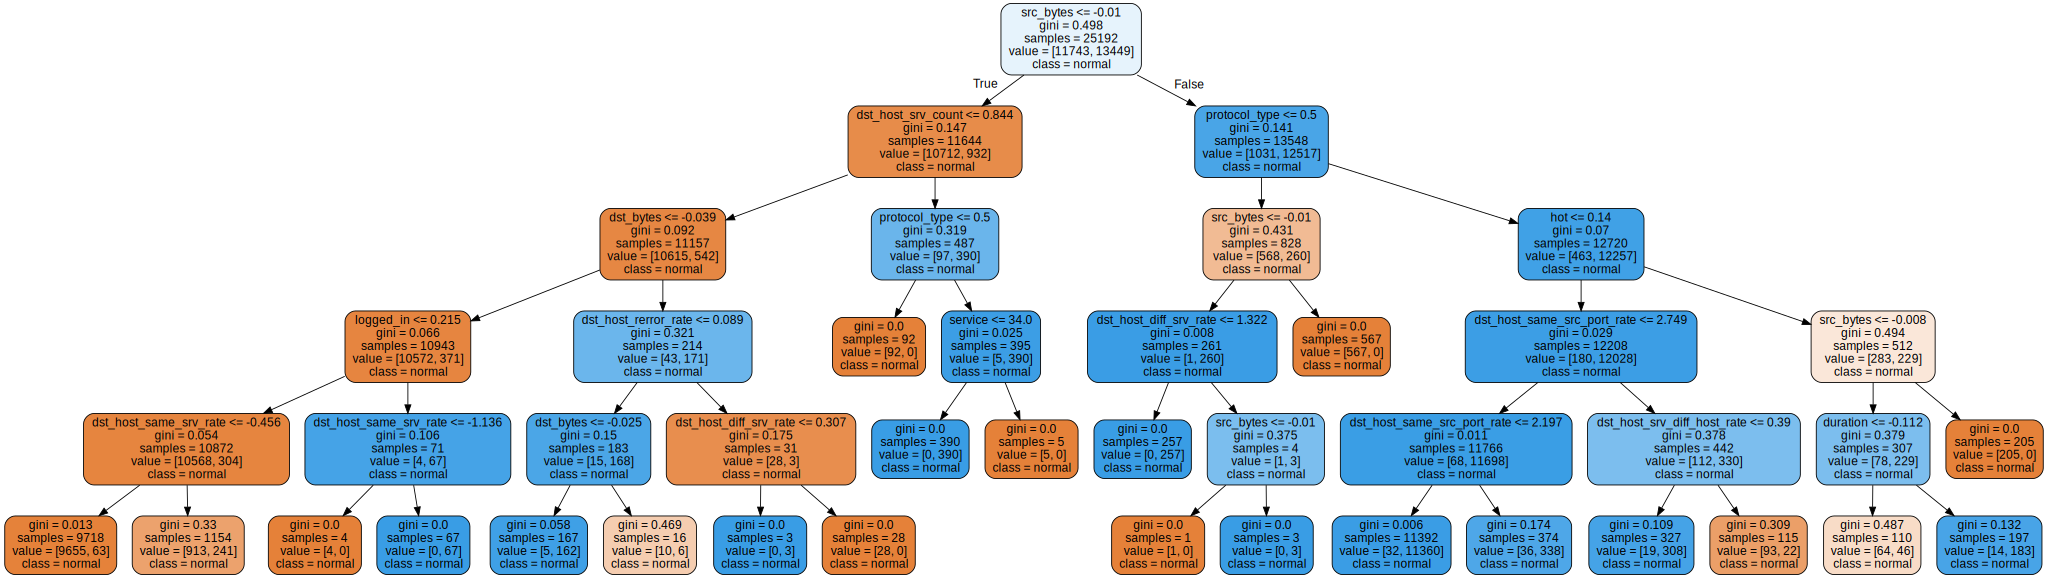

In [120]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree,
                               out_file=None,
                               feature_names=X_train.columns,
                               class_names=y_train,
                              filled=True, rounded=True))
graph

In [146]:
fi_s.sort_values(ascending=False)

src_bytes                      0.753845
protocol_type                  0.064006
dst_host_srv_count             0.047640
dst_bytes                      0.024224
dst_host_srv_rerror_rate       0.023224
hot                            0.022835
service                        0.012321
logged_in                      0.009589
dst_host_srv_diff_host_rate    0.008836
dst_host_same_srv_rate         0.007296
dst_host_same_src_port_rate    0.007035
duration                       0.003915
count                          0.003533
dst_host_rerror_rate           0.003451
dst_host_diff_srv_rate         0.003055
dst_host_srv_serror_rate       0.001315
diff_srv_rate                  0.001164
same_srv_rate                  0.000551
num_root                       0.000436
srv_count                      0.000416
dst_host_count                 0.000311
dst_host_serror_rate           0.000241
srv_diff_host_rate             0.000211
num_access_files               0.000156
flag                           0.000140


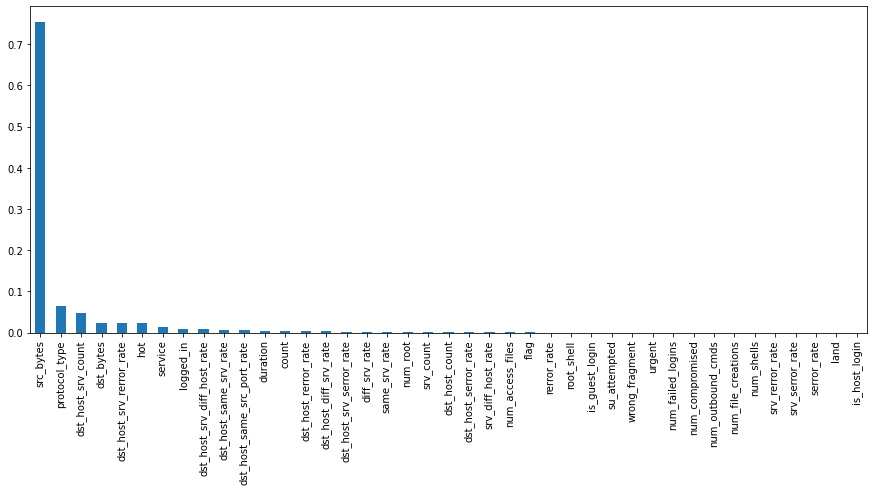

In [145]:
# DecisionTree
fi_s.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

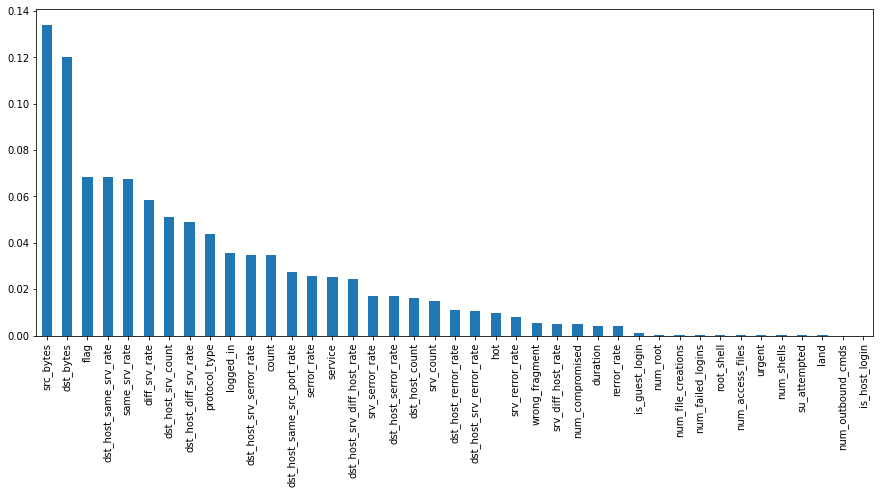

In [135]:
# randomforest
fi_rfs.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

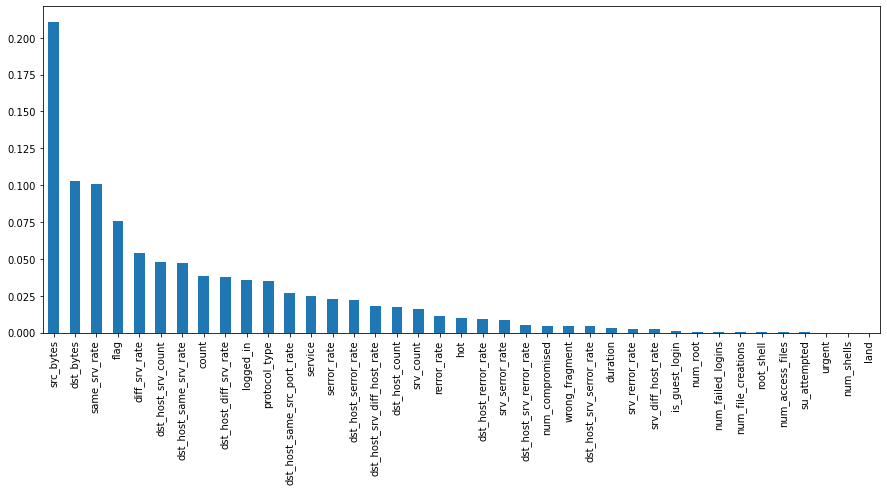

In [142]:
# randomforest, X_train1
fi_rfs1.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

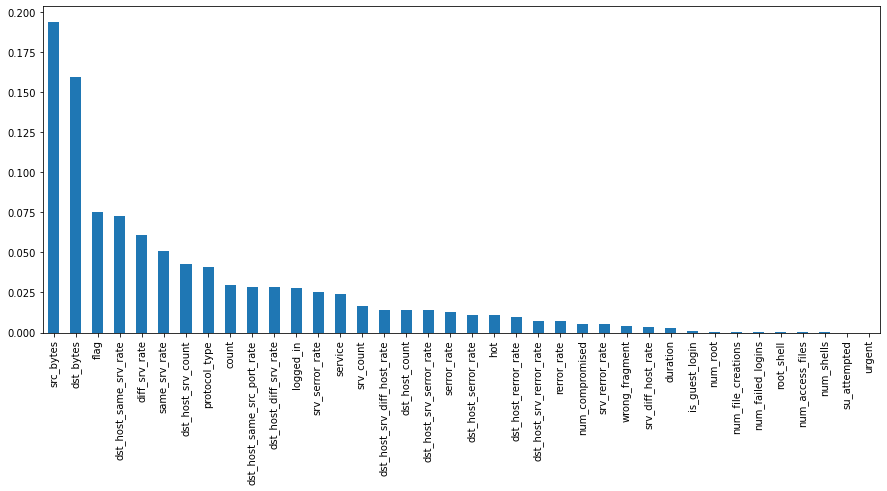

In [150]:
# randomforest, X_train2
fi_rfs2.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

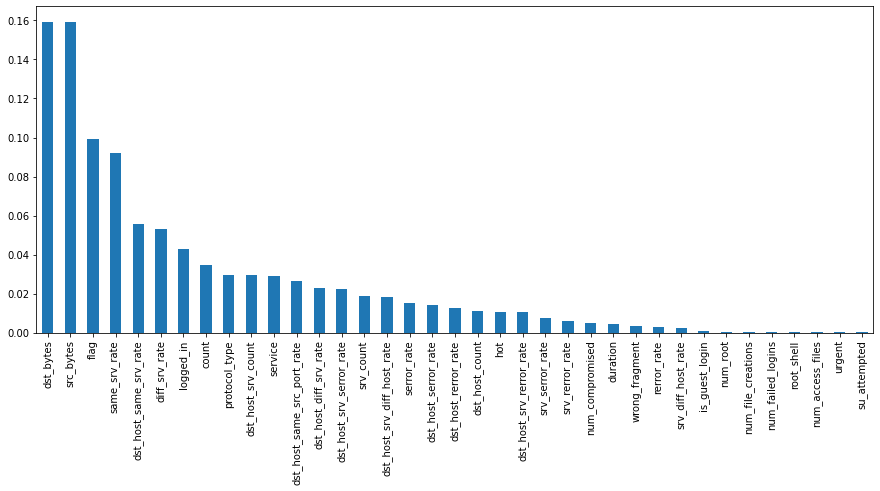

In [157]:
# randomforest, X_train3
fi_rfs3.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

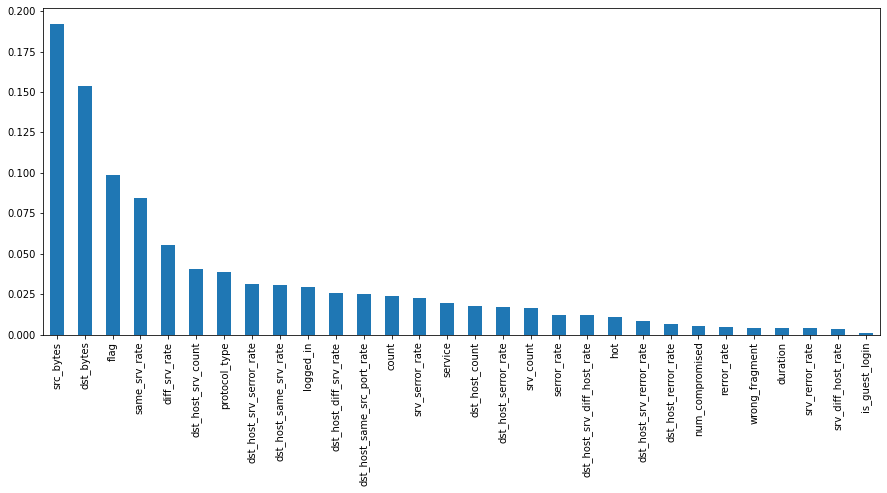

In [163]:
# randomforest, X_train4
fi_rfs4.sort_values(ascending=False).plot(kind='bar', figsize=(15,6))
plt.show()

In [164]:
fi_rfs4.sort_values(ascending=False)

src_bytes                      0.192129
dst_bytes                      0.153717
flag                           0.098444
same_srv_rate                  0.084451
diff_srv_rate                  0.055295
dst_host_srv_count             0.040585
protocol_type                  0.038714
dst_host_srv_serror_rate       0.031126
dst_host_same_srv_rate         0.030853
logged_in                      0.029331
dst_host_diff_srv_rate         0.025587
dst_host_same_src_port_rate    0.025092
count                          0.023905
srv_serror_rate                0.022709
service                        0.019550
dst_host_count                 0.017501
dst_host_serror_rate           0.017036
srv_count                      0.016613
serror_rate                    0.012253
dst_host_srv_diff_host_rate    0.012243
hot                            0.010819
dst_host_srv_rerror_rate       0.008678
dst_host_rerror_rate           0.006681
num_compromised                0.005050
rerror_rate                    0.004962
